In [2]:
# Importamos librerias necesarias.
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from ipywidgets import interact, interact_manual
%matplotlib inline

In [3]:
# Modelo 1: Un cuerpo fijo
def mov1 (x,t):
    x, dx = x
    return (dx, -G*M*m/x**2)    #Ecuación diferencial usada para modelar la trayectoria de un planeta alrededor de un Sol.

In [80]:
#Condiciones inciales:
G=5  #Gravedad del Sol
M=1  #Masa del Sol
m=1  #Masa del plameta

In [5]:
x0= (5.0, 0)   # Vector de condiciones iniciales, posición 5, velocidad inicial 0.
t1=5 #Primera condición de tiempo
t = np.linspace(0, t1, 1000)

xx = odeint(mov1, x0, t) 
salto1=t1/1000 #Es para hacerle entender al interact cada cuanto es cada paso

    

In [6]:
def plut(time=0):
    plt.figure(figsize=(6,5))
    x=xx[:,0]
    y=time
    plt.plot(y, x[int(time*(1/salto1))], 'ko', ms =10, label='Planeta')

    plt.plot(t, xx[:,0] , 'r', label='posicion')
    plt.legend(loc=(1.1, 0.1))
    plt.xlabel('Tiempo')
    plt.ylabel('Posicion')
interact_manual(plut, time = (0,t1,salto1));
plt.show()

In [7]:
def mov1 (x,t):
    x, dx, y, dy = x
    return (dx, -G*M*m*x/(y**2+x**2)**(3/2), dy, -G*M*m*y/(y**2+x**2)**(3/2))

In [8]:
x0= (5, 0, 0, 0.5)
t2=500 #Segunda condición de tiempo

t = np.linspace(0, t2, 1000)

xx = odeint(mov1, x0, t)

salto2=t2/1000



In [9]:
#plt.figure(figsize=(6,5))

#plt.figure(figsize = (5, 5))
#plt.scatter(xx[:,0], xx[:,2], c= xx[:,0] , s = 8, lw = 0)
#plt.xlabel('x', fontsize = 18)
#plt.ylabel('y', fontsize = 18)
#plt.show()

In [10]:
def plet(time=0):
    plt.figure(figsize=(6,5))
    x=xx[:,0]
    y=xx[:,2]
    z=time
    plt.scatter(xx[:,0], xx[:,2], c= xx[:,0] , s = 8, lw = 0)
    #plt.plot(z, x[int(time*(1/salto2))], 'ko', ms =10, label='Planeta 1')
    plt.plot(0, 0, 'ko', ms =10, label='Sol')
    #plt.plot(z, y[int(time*(1/salto2))], 'mD', ms =10, label='Planeta 2')
    plt.plot(x[int(time*(1/salto2))], y[int(time*(1/salto2))], 'mD', ms =10, label='Planeta 2')
    
interact_manual(plet, time = (0,t2,salto2));
plt.show()

In [11]:
def mov1 (x,t):
    x1, dx1, y1, dy1, x2, dx2, y2, dy2 = x
    return (dx1, -G*M*m*(x1-x2)/((y1-y2)**2+(x1-x2)**2)**(3/2), dy1, -G*M*m*(y1-y2)/((y1-y2)**2+(x1-x2)**2)**(3/2),
           dx2, -G*M*m*(x2-x1)/((y1-y2)**2+(x1-x2)**2)**(3/2), dy2, -G*M*m*(y2-y1)/((y1-y2)**2+(x1-x2)**2)**(3/2))

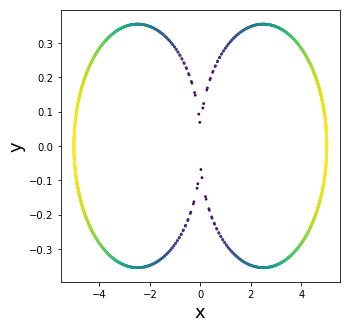

In [13]:
x0= (5, 0, 0, 0.05, -5, 0, 0, -0.05)

t = np.linspace(0, 50, 1000)

xx = odeint(mov1, x0, t)

plt.figure(figsize=(10,6))

plt.figure(figsize = (5, 5))
plt.scatter(xx[:,0], xx[:,2], c= xx[:,0] , s = 8, lw = 0)
plt.scatter(xx[:,4], xx[:,6], c= xx[:,0] , s = 8, lw = 0)
plt.xlabel('x', fontsize = 18)
plt.ylabel('y', fontsize = 18)
plt.show()